In [1]:
#Nahodny les
#V prvej casti sa mnozina dat delin stratifikovane no nevyuzivam metodu SMOTE
#Neskor v druhej casti pouzijem metodu SMOTE a opat aplikujem algoritmus Nahodny les

In [2]:
#nacitanie kniznic
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
from sklearn import preprocessing

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [4]:
#Nacitanie datasetu
data = pd.read_csv("DATA/student_prediction.csv")
#Zobrazenie hlavicky datasetu
data.head()

,STUDENTID,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,...,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


In [5]:
#Vymazanie stlpca STUDENTID
data.drop(columns = data.columns[0], axis = 1, inplace= True)

In [6]:
#Vyvorenie premennej x a y, pricom x su predikujuce atributu a y je predikovany atribut GRADE
x = data.drop(['GRADE'], axis = 1)
y = data['GRADE']



In [7]:
#Rozdelenie mnoziny stratifikovane na trenovaciu a testovaciu 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, stratify=y)

In [8]:
#Vyvorenie a natrenovanie modelu 
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [9]:
#Vytvorenie premenej testPred_tree, ktora obsahuje predikovane hodnoty
testPred_tree = model.predict(X_test)

In [10]:
#Vypis kontingencnej tabulky
table = pd.crosstab(testPred_tree, y_test)
table

GRADE,0,1,2,3,4,5,6,7
row_0,,,,,,,,
1,1,7,5,2,1,1,0,0
2,1,2,2,1,1,1,0,0
3,1,2,0,2,0,2,0,0
4,0,0,0,0,0,0,1,0
5,0,0,0,1,0,0,1,1
6,0,0,0,0,0,0,0,3
7,0,0,0,0,1,1,2,1


In [11]:
#vypis klasifikacneho reportu
print(classification_report(y_test, testPred_tree))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.41      0.64      0.50        11
           2       0.25      0.29      0.27         7
           3       0.29      0.33      0.31         6
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         4
           7       0.20      0.20      0.20         5

    accuracy                           0.27        44
   macro avg       0.14      0.18      0.16        44
weighted avg       0.20      0.27      0.23        44



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AUC for Class 1: 0.959349593495935
AUC for Class 2: 0.7851239669421487
AUC for Class 3: 0.6389961389961389
AUC for Class 4: 0.692982456140351
AUC for Class 5: 0.6219512195121951
AUC for Class 6: 0.5692307692307693
AUC for Class 7: 0.728125
AUC for Class 8: 0.9076923076923077


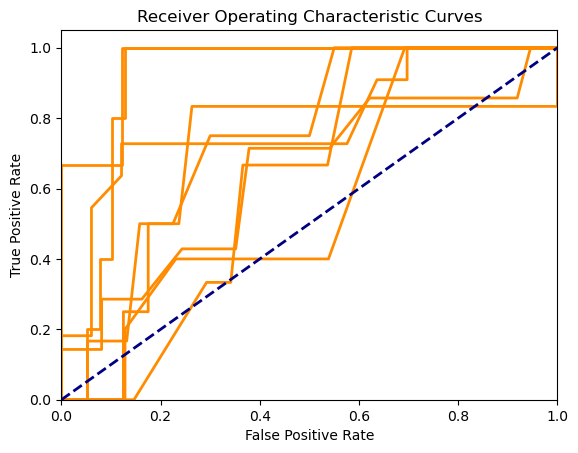

In [12]:
#Graficke zobraznie a zobrazenie hodnot AUC
y_score = model.predict_proba(X_test)

from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(y_test, classes=[0,1, 2, 3, 4, 5, 6,7])
n_classes = y_test_bin.shape[1]

from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
  plt.plot(fpr[i], tpr[i], color='darkorange', lw=2)
  print('AUC for Class {}: {}'.format(i+1, auc(fpr[i], tpr[i])))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curves')
plt.show()

Class=1, n=35 (24.138%)
Class=2, n=24 (16.552%)
Class=5, n=17 (11.724%)
Class=0, n=8 (5.517%)
Class=3, n=21 (14.483%)
Class=4, n=10 (6.897%)
Class=7, n=17 (11.724%)
Class=6, n=13 (8.966%)


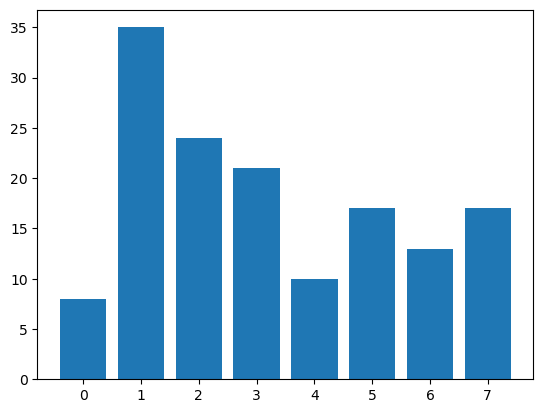

In [13]:
#Tu mozeme vidiet rozdelenie atributu GRADE, ktory je predikovany atribut
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from matplotlib import pyplot
y = LabelEncoder().fit_transform(y)
# ciselny vypis
counter = Counter(y)
for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# graf distribucie hodnot
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [14]:
#V tejto casti uz na dataset aplikujem metodu SMOTE

In [15]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [16]:
from pandas import read_csv
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

Class=1, n=35 (12.500%)
Class=2, n=35 (12.500%)
Class=5, n=35 (12.500%)
Class=0, n=35 (12.500%)
Class=3, n=35 (12.500%)
Class=4, n=35 (12.500%)
Class=7, n=35 (12.500%)
Class=6, n=35 (12.500%)


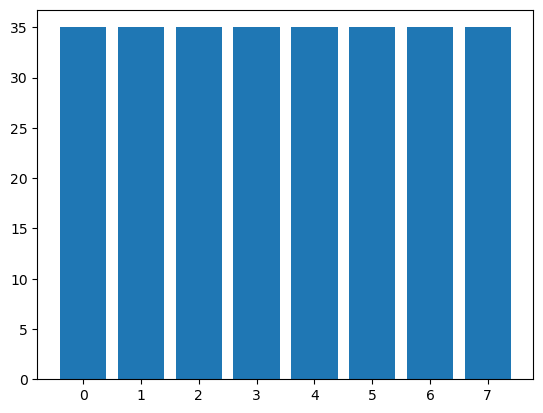

In [17]:
#Pouzitie metody SMOTE, ktora zabezpecila ze vsetky triedy mali rovnake mnozstvo poloziek
y = LabelEncoder().fit_transform(y)
# transformacia datasetu
oversample = SMOTE()
X, y = oversample.fit_resample(x, y)
# ciselny vypis distribucie hodnot
counter = Counter(y)
for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# graf distribucie hodnot
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [18]:
#Opat stratifikovane rozdelenie mnoziny na trenovaciu a testovaciu
x_train, x_test, Y_train,Y_test = train_test_split(X,y,test_size = 0.3, random_state = 0, stratify = y)

In [19]:
#Vytvorenie a natrenovanie modelu 2
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
model2.fit(x_train, Y_train)

RandomForestClassifier()

In [20]:

##Vytvorenie premenej testPred_tree2, ktora obsahuje predikovane hodnoty
testPred_tree2 = model2.predict(x_test)

In [21]:
#Vypis kontingencnej tabulky
table = pd.crosstab(testPred_tree2, Y_test)
table

col_0,0,1,2,3,4,5,6,7
row_0,,,,,,,,
0,10,1,0,0,1,0,0,0
1,1,4,2,1,1,1,0,0
2,0,1,5,0,2,0,0,1
3,0,1,1,9,0,0,0,0
4,0,0,0,0,5,0,0,0
5,0,3,2,1,0,8,0,0
6,0,0,0,0,1,1,9,0
7,0,0,0,0,1,1,1,9


In [22]:
#Vypis klasifikacneho reportu
print(classification_report(Y_test, testPred_tree2))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87        11
           1       0.40      0.40      0.40        10
           2       0.56      0.50      0.53        10
           3       0.82      0.82      0.82        11
           4       1.00      0.45      0.62        11
           5       0.57      0.73      0.64        11
           6       0.82      0.90      0.86        10
           7       0.75      0.90      0.82        10

    accuracy                           0.70        84
   macro avg       0.72      0.70      0.69        84
weighted avg       0.72      0.70      0.70        84

